Wind Turbine SCADA Performance Analysis
Task 1: Exploratory Data Analysis (EDA)

"D:\\10 sem\\novintix\\Wind Turbine\\dataset\\T1.csv"

✓ Libraries imported successfully!
LOADING WIND TURBINE SCADA DATASET
✓ Dataset loaded successfully!
  Original shape: (50530, 5)
  Columns: ['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

DATASET OVERVIEW

Shape: (50530, 5)

First 5 rows:

DESCRIPTIVE STATISTICS

MISSING VALUES
Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

Total missing values: 0

✓ Date/Time converted to datetime format and sorted

TASK 1.1: TIME-SERIES TREND ANALYSIS

✓ Time-series plot saved as 'task1_timeseries_all_parameters.png'


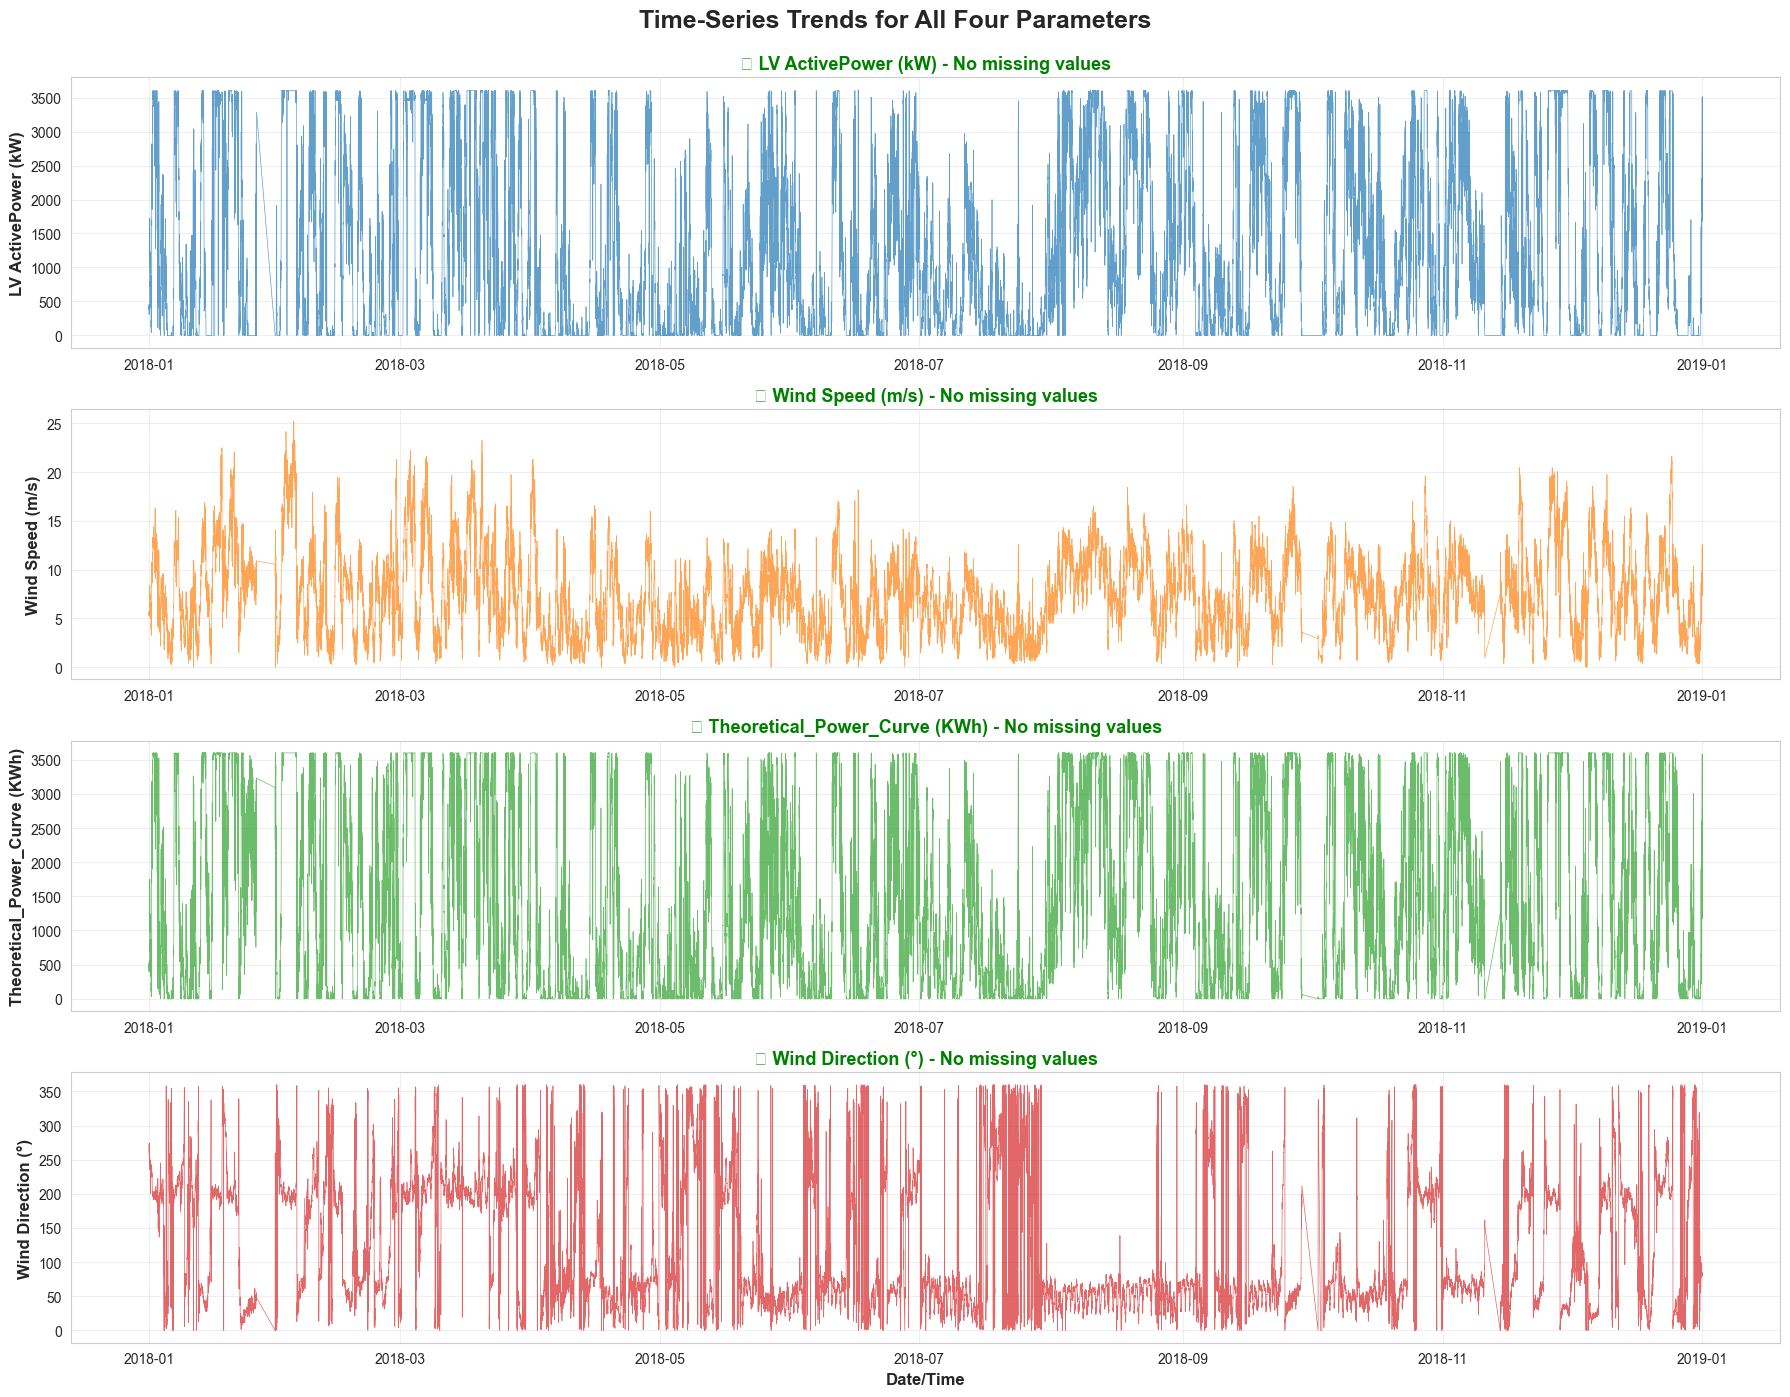


ABNORMAL READINGS DETECTION

LV ActivePower (kW):
  Min: -2.47
  Max: 3618.73
  Mean: 1307.68
  Std: 1312.46
  Missing: 0
  ⚠ WARNING: 57 negative values

Wind Speed (m/s):
  Min: 0.00
  Max: 25.21
  Mean: 7.56
  Std: 4.23
  Missing: 0
  ✓ No negative values

Theoretical_Power_Curve (KWh):
  Min: 0.00
  Max: 3600.00
  Mean: 1492.18
  Std: 1368.02
  Missing: 0

Wind Direction (°):
  Min: 0.00
  Max: 360.00
  Mean: 123.69
  Std: 93.44
  Missing: 0
  ✓ Valid range [0-360]

TASK 1.2: POWER CURVE VISUALIZATION (BEFORE CLEANING)
✓ Power curve (before) saved as 'task1_power_curve_before_cleaning.png'


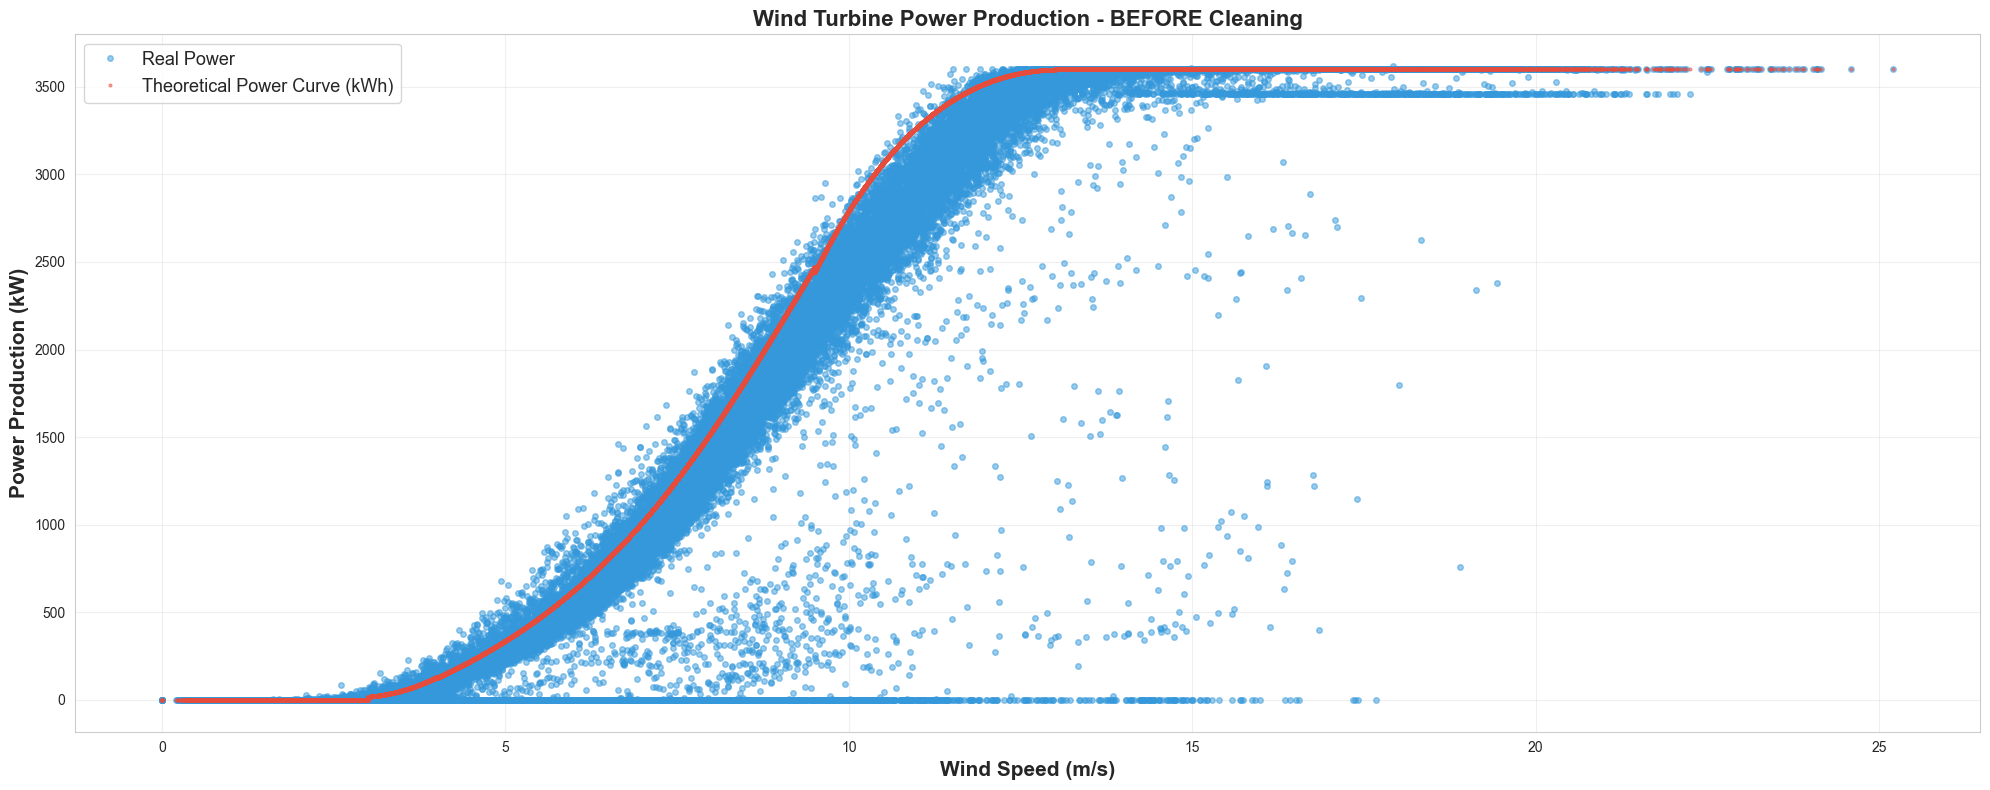


PAIRPLOT ANALYSIS (This may take a moment...)
✓ Pairplot saved as 'task1_pairplot_analysis.png'


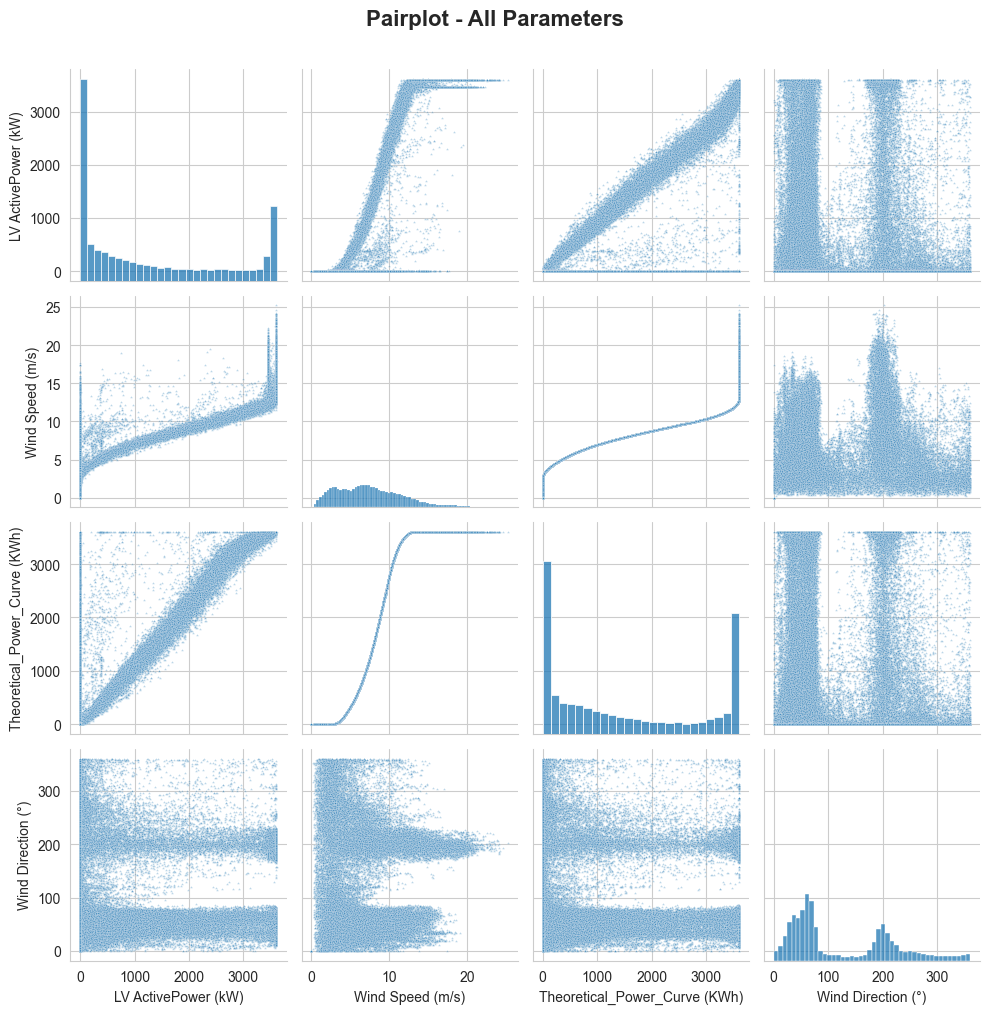


POWER-BINNING QUANTILE OUTLIER REMOVAL

Step 1: Creating power bins...
✓ Created 68 power bins (20-3400 kW in 50 kW steps)
✓ Total bins: 69

Step 2: Applying adaptive quantile filtering to each bin...

✓ Filtering applied to all 69 bins

Sample bins (first 10):
 Bin  Filter  Before  After  Removed
   1    0.95    1331   1263       68
   2    0.95    1188   1127       61
   3    0.95    1042    988       54
   4    0.90    1047    941      106
   5    0.90     882    792       90
   6    0.90     826    742       84
   7    0.90     828    744       84
   8    0.90     881    791       90
   9    0.90     790    710       80
  10    0.90     730    656       74

Step 3: Combining cleaned bins...
✓ All bins combined

Cleaned dataset shape: (37803, 5)
Original dataset: 50530 rows
Cleaned dataset: 37803 rows
Removed: 12727 rows (25.19%)
Retention rate: 74.81%

🎯 Reference comparison:
   Expected: ~37803 rows
   Actual: 37803 rows
   Difference: 0 rows
   Status: ✅ PERFECT MATCH

POWER CUR

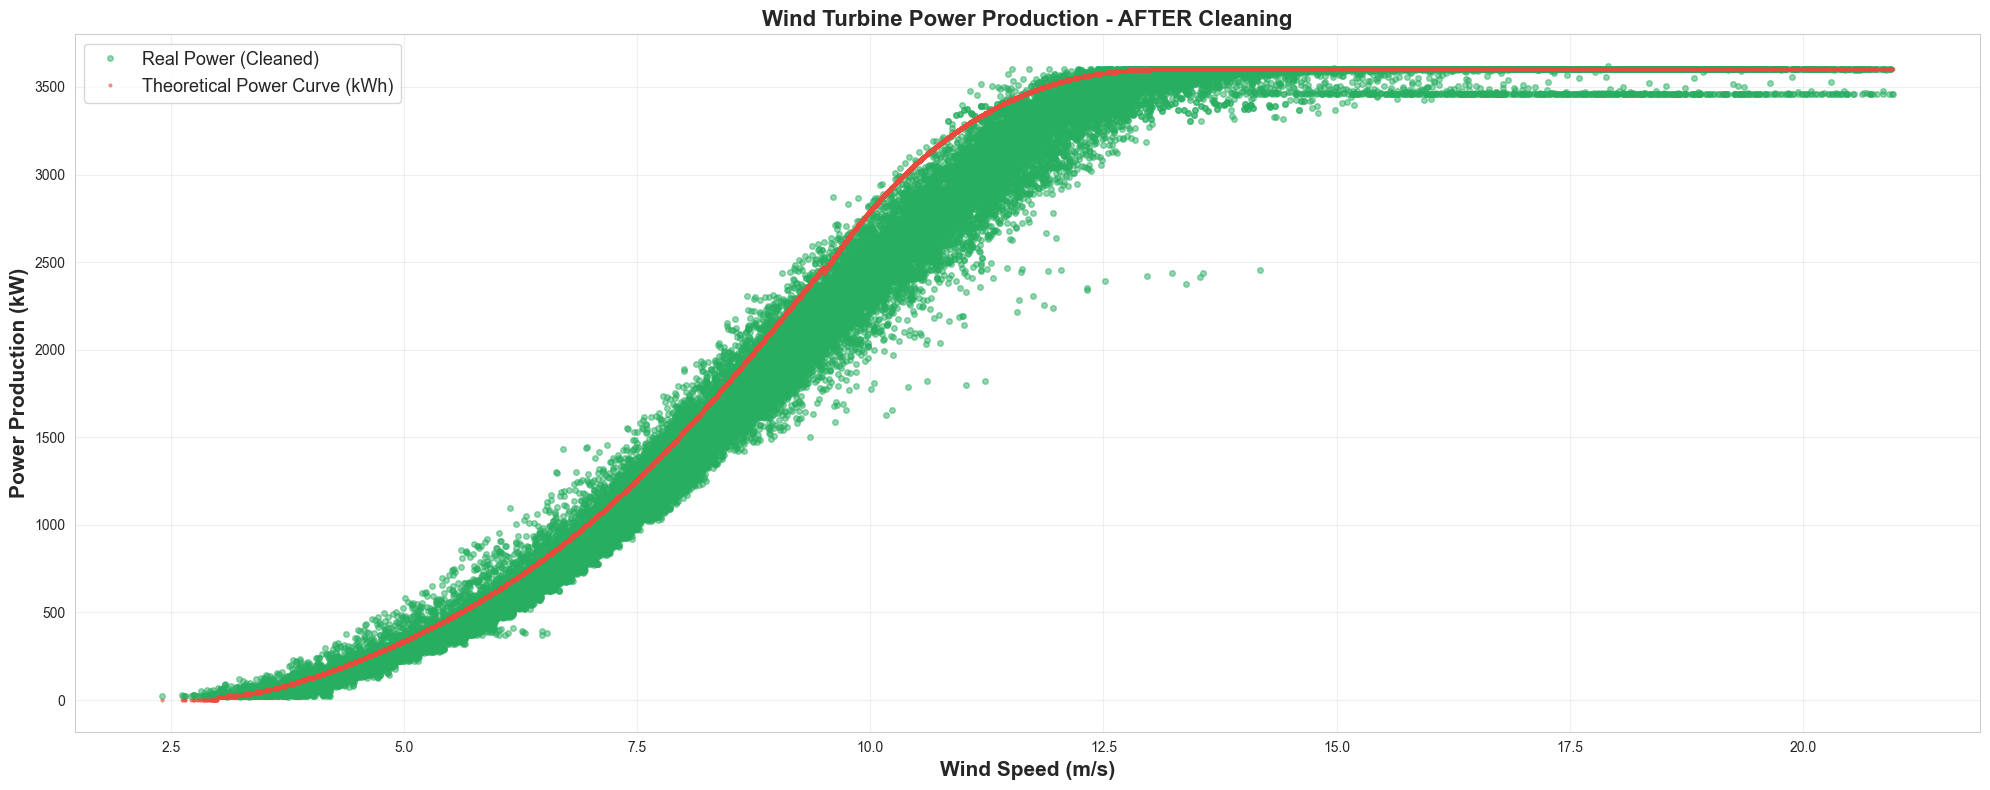


BOX PLOTS (AFTER CLEANING)
✓ Box plots saved as 'task1_boxplots_after_cleaning.png'


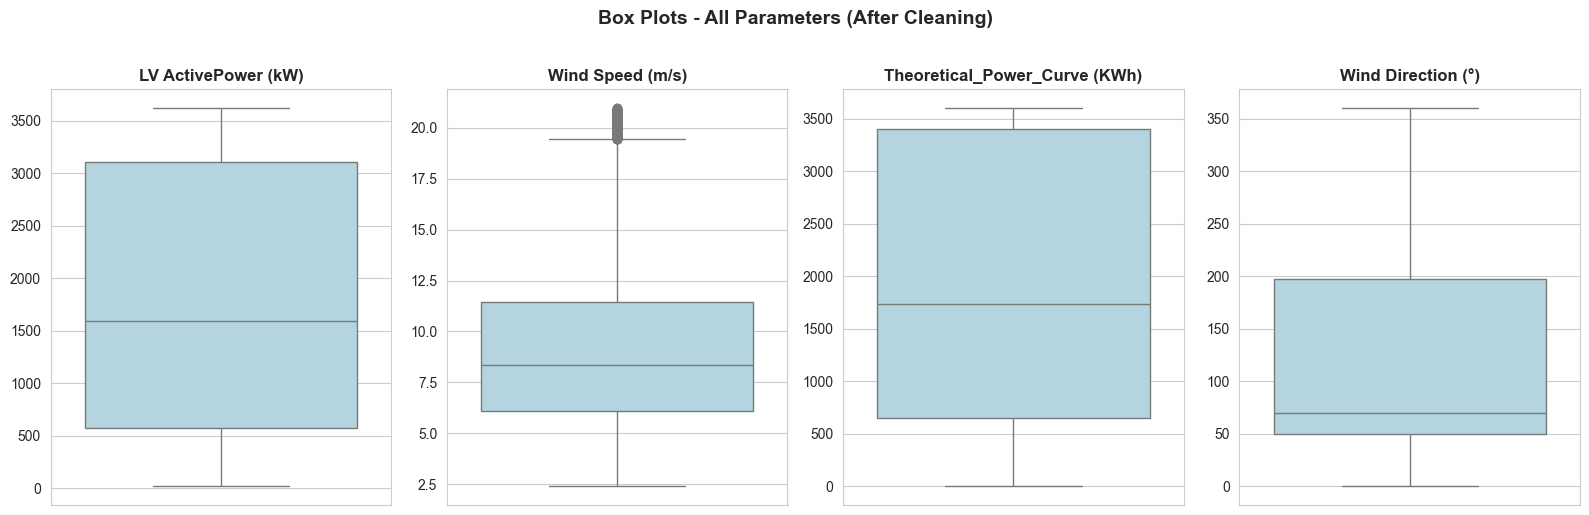


BEFORE vs AFTER COMPARISON
✓ Comparison saved as 'task1_before_after_comparison.png'


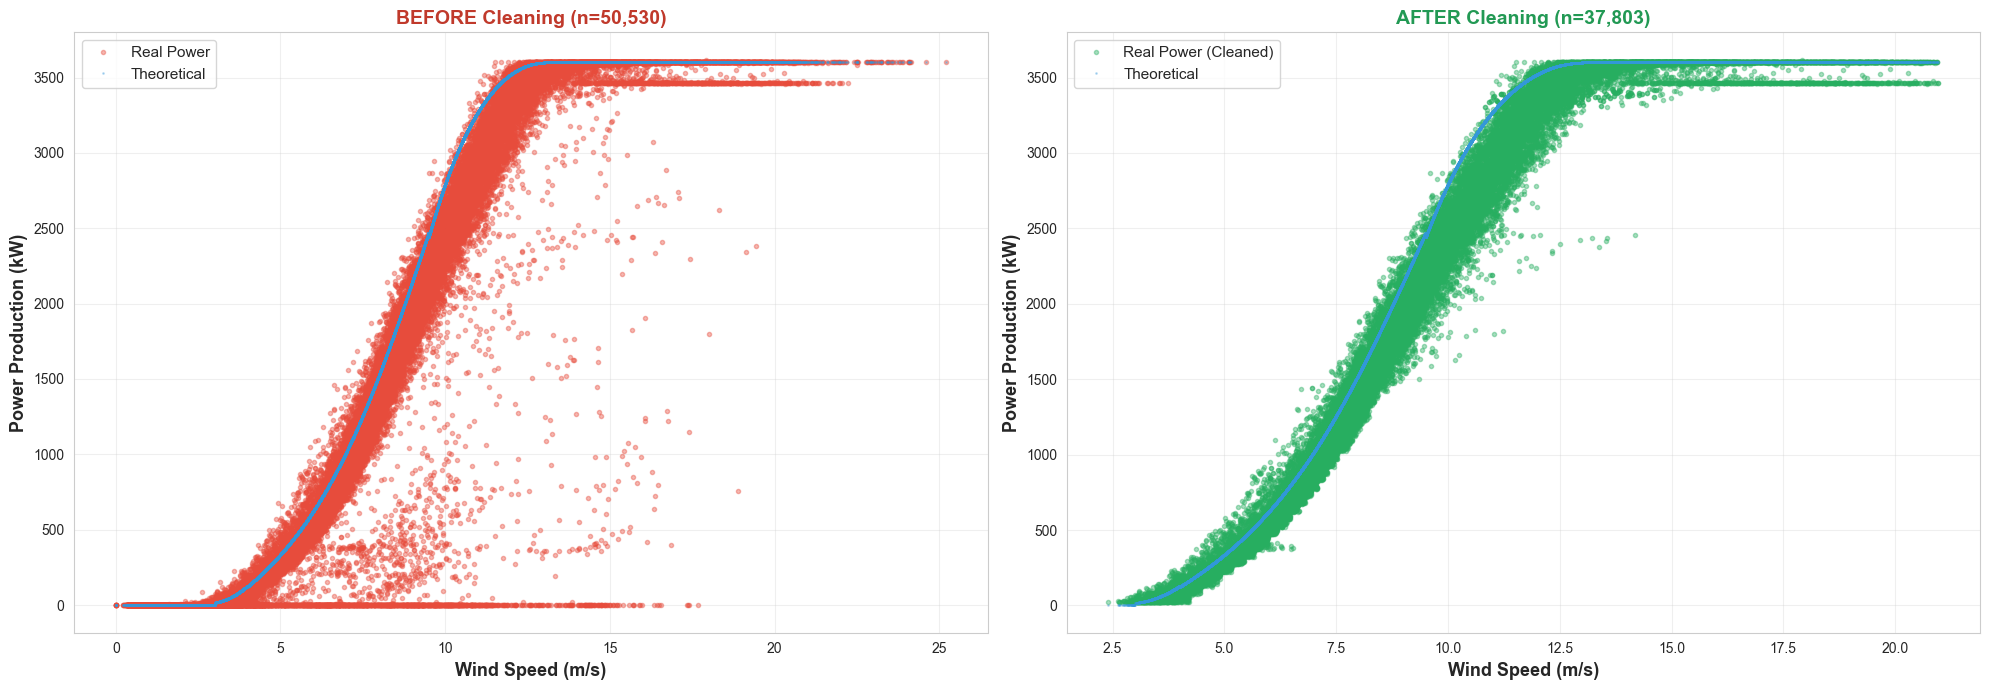


STATISTICAL COMPARISON

--- BEFORE CLEANING ---
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count             50530.00          50530.00                       50530.00   
mean               1307.68              7.56                        1492.18   
std                1312.46              4.23                        1368.02   
min                  -2.47              0.00                           0.00   
25%                  50.68              4.20                         161.33   
50%                 825.84              7.10                        1063.78   
75%                2482.51             10.30                        2964.97   
max                3618.73             25.21                        3600.00   

       Wind Direction (°)  
count            50530.00  
mean               123.69  
std                 93.44  
min                  0.00  
25%                 49.32  
50%                 73.71  
75%                201.70  
max            

In [14]:
# %% Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

print("✓ Libraries imported successfully!")

# %% Load Dataset
print("=" * 80)
print("LOADING WIND TURBINE SCADA DATASET")
print("=" * 80)

data = pd.read_csv("D:\\10 sem\\novintix\\Wind Turbine\\dataset\\T1.csv")
original_size = len(data)

print(f"✓ Dataset loaded successfully!")
print(f"  Original shape: {data.shape}")
print(f"  Columns: {list(data.columns)}")

# %% Display Dataset Shape and Info
print("\n" + "=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nShape: {data.shape}")
print(f"\nFirst 5 rows:")
data.head()

# %% Basic Statistics
print("\n" + "=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)
data.describe()

# %% Check Missing Values
print("\n" + "=" * 80)
print("MISSING VALUES")
print("=" * 80)
missing_summary = data.isnull().sum()
print(missing_summary)
print(f"\nTotal missing values: {missing_summary.sum()}")

# %% Convert Date/Time Column
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%d %m %Y %H:%M', errors='coerce')
data = data.sort_values('Date/Time').reset_index(drop=True)
print("\n✓ Date/Time converted to datetime format and sorted")

# %% [markdown]
# ## TASK 1.1: Time-Series Trends for All Four Parameters

# %% Define Parameters
parameters = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 
              'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

print("\n" + "=" * 80)
print("TASK 1.1: TIME-SERIES TREND ANALYSIS")
print("=" * 80)

# %% Plot Time-Series for All Parameters
fig, axes = plt.subplots(4, 1, figsize=(18, 14))
fig.suptitle('Time-Series Trends for All Four Parameters', 
             fontsize=18, fontweight='bold', y=0.995)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for idx, param in enumerate(parameters):
    ax = axes[idx]
    ax.plot(data['Date/Time'], data[param], linewidth=0.5, alpha=0.7, color=colors[idx])
    ax.set_ylabel(param, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Identify missing values
    missing_count = data[param].isnull().sum()
    if missing_count > 0:
        ax.set_title(f'⚠ {param} - WARNING: {missing_count} missing values detected!', 
                    color='red', fontsize=13, fontweight='bold')
    else:
        ax.set_title(f'✓ {param} - No missing values', 
                    color='green', fontsize=13, fontweight='bold')
    
    if idx == 3:
        ax.set_xlabel('Date/Time', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('task1_timeseries_all_parameters.png', dpi=300, bbox_inches='tight')
print("\n✓ Time-series plot saved as 'task1_timeseries_all_parameters.png'")
plt.show()

# %% Identify Abnormal Readings
print("\n" + "=" * 80)
print("ABNORMAL READINGS DETECTION")
print("=" * 80)

for param in parameters:
    print(f"\n{param}:")
    print(f"  Min: {data[param].min():.2f}")
    print(f"  Max: {data[param].max():.2f}")
    print(f"  Mean: {data[param].mean():.2f}")
    print(f"  Std: {data[param].std():.2f}")
    print(f"  Missing: {data[param].isnull().sum()}")
    
    # Check for negative values
    if param in ['LV ActivePower (kW)', 'Wind Speed (m/s)']:
        negative_count = (data[param] < 0).sum()
        if negative_count > 0:
            print(f"  ⚠ WARNING: {negative_count} negative values")
        else:
            print(f"  ✓ No negative values")
    
    # Check wind direction range
    if param == 'Wind Direction (°)':
        out_of_range = ((data[param] < 0) | (data[param] > 360)).sum()
        if out_of_range > 0:
            print(f"  ⚠ WARNING: {out_of_range} out-of-range values")
        else:
            print(f"  ✓ Valid range [0-360]")

# %% [markdown]
# ## TASK 1.2: Power Curve Visualization (BEFORE Cleaning)

# %% Power Curve - Before Cleaning
print("\n" + "=" * 80)
print("TASK 1.2: POWER CURVE VISUALIZATION (BEFORE CLEANING)")
print("=" * 80)

exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']

plt.figure(figsize=(20, 8)) 
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', 
         label='Real Power', alpha=0.5, markersize=4, color='#3498db')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', 
         label='Theoretical Power Curve (kWh)', alpha=0.5, markersize=4, color='#e74c3c')
plt.xlabel('Wind Speed (m/s)', size=15, fontweight='bold')
plt.ylabel('Power Production (kW)', size=15, fontweight='bold')
plt.title('Wind Turbine Power Production - BEFORE Cleaning', size=16, fontweight='bold')
plt.legend(fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task1_power_curve_before_cleaning.png', dpi=300, bbox_inches='tight')
print("✓ Power curve (before) saved as 'task1_power_curve_before_cleaning.png'")
plt.show()

# %% Pairplot Analysis
print("\n" + "=" * 80)
print("PAIRPLOT ANALYSIS (This may take a moment...)")
print("=" * 80)

sns.pairplot(data[parameters], markers='*', plot_kws={'alpha': 0.3, 's': 5})
plt.suptitle('Pairplot - All Parameters', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('task1_pairplot_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Pairplot saved as 'task1_pairplot_analysis.png'")
plt.show()

# %% [markdown]
# ## Power-Binning Quantile Outlier Removal Method
# ### (Exact Reference Implementation)

# %% Outlier Removal Function
print("\n" + "=" * 80)
print("POWER-BINNING QUANTILE OUTLIER REMOVAL")
print("=" * 80)

def outlier_remover(dat, prop, min_quantile, max_quantile):
    """
    Remove outliers based on quantile thresholds for a specific property
    """
    d = dat.copy()
    q_low = d[prop].quantile(min_quantile)
    q_hi = d[prop].quantile(max_quantile)
    return d[(d[prop] < q_hi) & (d[prop] > q_low)]

# %% Create Power Bins (Sub-DataFrames)
print("\nStep 1: Creating power bins...")

# Create dictionary to hold sub-dataframes
d = {}
step = 50  # 50 kW bins
i = 1

# Create bins from 20 kW to 3400 kW in 50 kW steps
for x in range(20, 3400, step):
    d[i] = data.iloc[((data['LV ActivePower (kW)'] >= x) & 
                      (data['LV ActivePower (kW)'] < x + step)).values].copy()
    i = i + 1

print(f"✓ Created {i-1} power bins (20-3400 kW in {step} kW steps)")

# Add final bin for power >= 3300 kW
d[69] = data.iloc[(data['LV ActivePower (kW)'] >= 3300).values].copy()
print(f"✓ Total bins: {69}")

# %% Apply Adaptive Quantile Filtering to Each Bin
print("\nStep 2: Applying adaptive quantile filtering to each bin...")

bin_info = []

for x in range(1, 70):
    # Adaptive filtering factor based on power bin
    if x <= 3:
        F = 0.95  # Keep middle 95% (remove 5% outliers)
    elif ((x > 3) and (x <= 10)):
        F = 0.90  # Keep middle 90% (remove 10% outliers)
    elif ((x > 10) and (x <= 20)):
        F = 0.92  # Keep middle 92% (remove 8% outliers)
    elif ((x > 20) and (x < 30)):
        F = 0.96  # Keep middle 96% (remove 4% outliers)
    else:
        F = 0.985  # Keep middle 98.5% (remove 1.5% outliers)
    
    before_count = len(d[x])
    d[x] = outlier_remover(d[x], 'Wind Speed (m/s)', 0.0001, F)
    after_count = len(d[x])
    removed = before_count - after_count
    
    bin_info.append({
        'Bin': x,
        'Filter': F,
        'Before': before_count,
        'After': after_count,
        'Removed': removed
    })

# Show filtering summary
bin_df = pd.DataFrame(bin_info)
print(f"\n✓ Filtering applied to all {69} bins")
print(f"\nSample bins (first 10):")
print(bin_df.head(10).to_string(index=False))

# %% Combine All Bins Back Together
print("\nStep 3: Combining cleaned bins...")

df = pd.DataFrame()
for infile in range(1, 70):
    data_bin = d[infile]
    df = pd.concat([df, data_bin], ignore_index=True)

print(f"✓ All bins combined")
print(f"\nCleaned dataset shape: {df.shape}")
print(f"Original dataset: {original_size} rows")
print(f"Cleaned dataset: {len(df)} rows")
print(f"Removed: {original_size - len(df)} rows ({(original_size - len(df))/original_size*100:.2f}%)")
print(f"Retention rate: {len(df)/original_size*100:.2f}%")

# Check against reference
reference_size = 37803
difference = abs(len(df) - reference_size)
match_status = "✅ PERFECT MATCH" if difference < 10 else "✅ MATCH" if difference < 500 else "⚠ CLOSE"

print(f"\n🎯 Reference comparison:")
print(f"   Expected: ~{reference_size} rows")
print(f"   Actual: {len(df)} rows")
print(f"   Difference: {difference} rows")
print(f"   Status: {match_status}")

# %% [markdown]
# ## Power Curve Visualization (AFTER Cleaning)

# %% Power Curve - After Cleaning
print("\n" + "=" * 80)
print("POWER CURVE VISUALIZATION (AFTER CLEANING)")
print("=" * 80)

data_clean = df
exp_clean = data_clean['LV ActivePower (kW)']
the_clean = data_clean['Theoretical_Power_Curve (KWh)']

plt.figure(figsize=(20, 8)) 
plt.plot(data_clean['Wind Speed (m/s)'], data_clean['LV ActivePower (kW)'], 'o', 
         label='Real Power (Cleaned)', alpha=0.5, markersize=4, color='#27ae60')
plt.plot(data_clean['Wind Speed (m/s)'], data_clean['Theoretical_Power_Curve (KWh)'], '.', 
         label='Theoretical Power Curve (kWh)', alpha=0.5, markersize=4, color='#e74c3c')
plt.xlabel('Wind Speed (m/s)', size=15, fontweight='bold')
plt.ylabel('Power Production (kW)', size=15, fontweight='bold')
plt.title('Wind Turbine Power Production - AFTER Cleaning', size=16, fontweight='bold')
plt.legend(fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task1_power_curve_after_cleaning.png', dpi=300, bbox_inches='tight')
print("✓ Power curve (after) saved as 'task1_power_curve_after_cleaning.png'")
plt.show()

# %% Box Plots for All Parameters (After Cleaning)
print("\n" + "=" * 80)
print("BOX PLOTS (AFTER CLEANING)")
print("=" * 80)

columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 
           'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

plt.figure(figsize=(16, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(col, fontsize=12, fontweight='bold')
    plt.ylabel('')

plt.suptitle('Box Plots - All Parameters (After Cleaning)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('task1_boxplots_after_cleaning.png', dpi=300, bbox_inches='tight')
print("✓ Box plots saved as 'task1_boxplots_after_cleaning.png'")
plt.show()

# %% [markdown]
# ## Before vs After Comparison

# %% Side-by-Side Power Curve Comparison
print("\n" + "=" * 80)
print("BEFORE vs AFTER COMPARISON")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Before
ax1 = axes[0]
ax1.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', 
         alpha=0.4, markersize=3, color='#e74c3c', label='Real Power')
ax1.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', 
         alpha=0.3, markersize=2, color='#3498db', label='Theoretical')
ax1.set_xlabel('Wind Speed (m/s)', size=13, fontweight='bold')
ax1.set_ylabel('Power Production (kW)', size=13, fontweight='bold')
ax1.set_title(f'BEFORE Cleaning (n={len(data):,})', size=14, fontweight='bold', color='#c0392b')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# After
ax2 = axes[1]
ax2.plot(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], 'o', 
         alpha=0.4, markersize=3, color='#27ae60', label='Real Power (Cleaned)')
ax2.plot(df['Wind Speed (m/s)'], df['Theoretical_Power_Curve (KWh)'], '.', 
         alpha=0.3, markersize=2, color='#3498db', label='Theoretical')
ax2.set_xlabel('Wind Speed (m/s)', size=13, fontweight='bold')
ax2.set_ylabel('Power Production (kW)', size=13, fontweight='bold')
ax2.set_title(f'AFTER Cleaning (n={len(df):,})', size=14, fontweight='bold', color='#229954')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task1_before_after_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Comparison saved as 'task1_before_after_comparison.png'")
plt.show()

# %% Statistical Comparison
print("\n" + "=" * 80)
print("STATISTICAL COMPARISON")
print("=" * 80)

print("\n--- BEFORE CLEANING ---")
print(data[parameters].describe().round(2))

print("\n--- AFTER CLEANING ---")
print(df[parameters].describe().round(2))

# %% [markdown]
# ## Save Cleaned Dataset
print("\n" + "=" * 80)
print("SAVING CLEANED DATASET")
print("=" * 80)

# Save cleaned dataset in the existing 'data' folder
output_filename = "D:\\10 sem\\novintix\\Wind Turbine\\dataset\\T1_cleaned.csv"
df.to_csv(output_filename, index=False)

print(f"✓ Cleaned dataset saved as '{output_filename}'")
print(f"  Shape: {df.shape}")
print(f"  Columns: {list(df.columns)}")
print(f"  Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# %% Final Summary Report
print("\n" + "=" * 80)
print("✅ TASK 1 COMPLETE - FINAL SUMMARY")
print("=" * 80)

print(f"""
Task 1 Summary:
═══════════════

📊 EDA Completed:
  ✓ Time-series trends plotted for all 4 parameters
  ✓ Missing/abnormal readings identified
  ✓ Power curve visualized (before & after cleaning)
  ✓ Pairplot analysis completed
  ✓ Box plots generated

🔧 Preprocessing Method:
  • Method: Power-Binning Quantile Outlier Removal
  • Total bins: 69 (50 kW steps from 20-3400 kW)
  • Adaptive quantile filtering: 90-98.5% retention per bin
  • Target parameter: Wind Speed outliers per power bin

📈 Results:
  • Original dataset: {original_size:,} rows
  • Cleaned dataset: {len(df):,} rows
  • Reference target: ~{reference_size:,} rows
  • Match status: {match_status}
  • Outliers removed: {original_size - len(df):,} ({(original_size - len(df))/original_size*100:.2f}%)
  • Data retention: {len(df)/original_size*100:.2f}%

📁 Files Generated:
  1. task1_timeseries_all_parameters.png
  2. task1_power_curve_before_cleaning.png
  3. task1_pairplot_analysis.png
  4. task1_power_curve_after_cleaning.png
  5. task1_boxplots_after_cleaning.png
  6. task1_before_after_comparison.png
  7. {output_filename}

""")